In [9]:
import json
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import f1_score,confusion_matrix
from glob import glob
from sklearn.utils.multiclass import unique_labels

In [10]:
!ls tmp_output/

aisopos_ntua.json  nikolaos_ted.json	   sentistrength_digg.json
debate.json	   sarcasm.json		   sentistrength_myspace.json
irony.json	   sentistrength_bbc.json  sentistrength_rw.json


In [11]:
with open('tmp_output/aisopos_ntua.json') as fin:
    json_obj = json.load(fin)

In [12]:
json_obj.keys()

dict_keys(['nfolds', 'dname', 'folds'])

In [13]:
def plot_confusion_matrix(cm, classes, f1_ma, f1_mi,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    
    if normalize:
        title = 'Normalized confusion matrix (%s)' % title
        cm = cm.astype('float') / cm.sum()
    else:
        title = 'Confusion matrix, without normalization (%s)' % title
        
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=[ '%s\n(%.3f/%.3f)' % (c,f_mi,f_ma) for (f_mi,f_ma,c) in zip(f1_mi,f1_ma,classes)],
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else '.0f'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

In [14]:
json_obj['folds'][0]['metaclassifier']

{'classifier': "<class 'sklearn.tree.tree.DecisionTreeClassifier'>",
 'params': {'class_weight': None,
  'criterion': 'entropy',
  'max_depth': 6,
  'max_features': None,
  'max_leaf_nodes': None,
  'min_impurity_decrease': 0.0,
  'min_impurity_split': None,
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'min_weight_fraction_leaf': 0.0,
  'presort': False,
  'random_state': None,
  'splitter': 'best'}}

In [17]:
!pip3 install --user pydotplus

     |████████████████████████████████| 286kB 3.5MB/s eta 0:00:01
  Stored in directory: /home/mangaravite/.cache/pip/wheels/35/7b/ab/66fb7b2ac1f6df87475b09dc48e707b6e0de80a6d8444e3628
Successfully built pydotplus
You should consider upgrading via the 'pip install --upgrade pip' command.


In [18]:
from sklearn.tree import export_graphviz
import pydotplus

In [26]:
a = []
a.append( np.array([1,2,3]) )
a.append( np.array([3,2,1]) )
np.matrix(a).T

matrix([[1, 3],
        [2, 2],
        [3, 1]])

/home/mangaravite/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


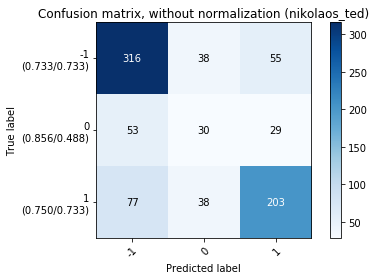

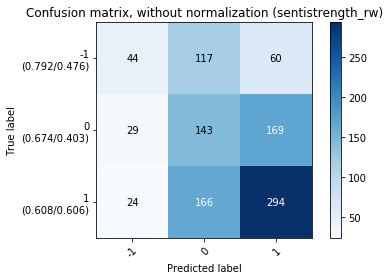

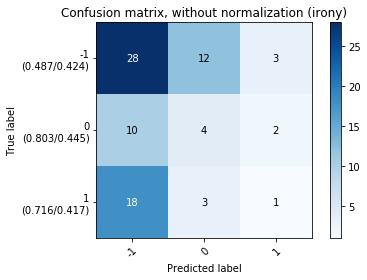

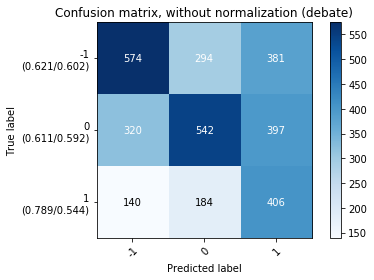

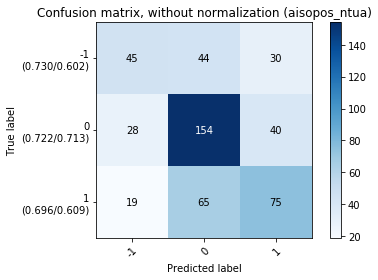

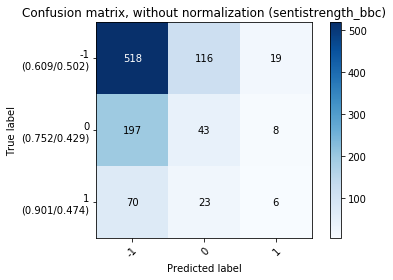

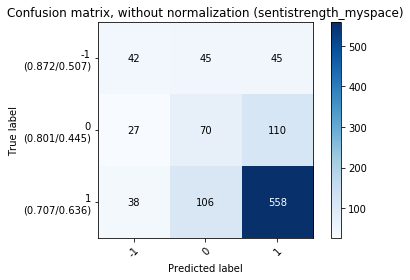

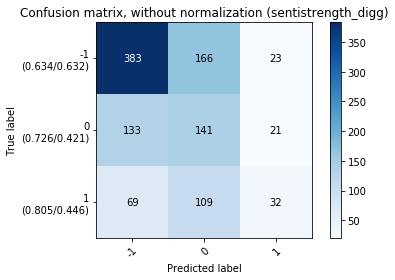

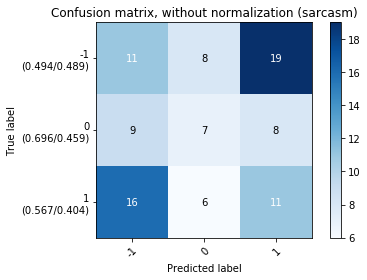

In [21]:
for d in glob('tmp_output/*.json'):
    with open(d) as fin:
        json_obj = json.load(fin)
    f1_mi_all = []
    f1_ma_all = []
    classes = sorted(list(json_obj['folds'][0]['weak_classifier'].keys()))
    n = len(classes)
    cms = np.zeros(( n, n ))
    individual_result_ma = { c: [] for c in classes }
    individual_result_mi = { c: [] for c in classes }
    for f in range(json_obj['nfolds']):
        y_true = json_obj['folds'][f]['y_test']
        y_pred = json_obj['folds'][f]['y_test_pred']
        
        f1_mi = f1_score(y_true, y_pred, average='micro')
        f1_ma = f1_score(y_true, y_pred, average='macro')
        f1_mi_all.append( f1_mi )
        f1_ma_all.append( f1_ma )
        
        for c in classes:
            y_test_transformed = json_obj['folds'][f]['weak_class_result'][c]['y_test_transformed']
            y_pred_weak = json_obj['folds'][f]['weak_class_result'][c]['y_pred']
            individual_result_ma[c].append( f1_score(y_test_transformed, y_pred_weak, average='macro') )
            individual_result_mi[c].append( f1_score(y_test_transformed, y_pred_weak, average='micro') )
        
        cm = confusion_matrix(y_true, y_pred)
        cms += cm
    vector_ma = [ np.array(individual_result_ma[c]).mean() for c in classes ]
    vector_mi = [ np.array(individual_result_mi[c]).mean() for c in classes ]
    plot_confusion_matrix(cms, classes, vector_ma, vector_mi, title=json_obj['dname'])
    f1_mi_all = np.array(f1_mi_all)
    f1_ma_all = np.array(f1_ma_all)
    

In [20]:
import StringIO

ModuleNotFoundError: No module named 'StringIO'